In [3]:
import pandas as pd
import numpy as np 
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
movies_data = pd.read_csv('movies.csv')

In [5]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
movies_data.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia
4802,4802,0,Documentary,NaN,25975,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger


In [7]:
movies_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
movies_data.shape

(4803, 24)

In [9]:
movies_data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [10]:
#selecting the relevant features
selected_features = ['genres','keywords','tagline','cast','director']

In [11]:
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [12]:
## replacing the null values with null strings

for feature in selected_features:
    movies_data[feature]=movies_data[feature].fillna('')

In [13]:
## combination of 5 features selected
combined_feature = movies_data['genres']+''+movies_data['keywords']+''+movies_data['tagline']+''+['cast']+''+['director']
print(combined_feature)

0       Action Adventure Fantasy Science Fictioncultur...
1       Adventure Fantasy Actionocean drug abuse exoti...
2       Action Adventure Crimespy based on novel secre...
3       Action Crime Drama Thrillerdc comics crime fig...
4       Action Adventure Science Fictionbased on novel...
                              ...                        
4798    Action Crime Thrillerunited states\u2013mexico...
4799    Comedy RomanceA newlywed couple's honeymoon is...
4800    Comedy Drama Romance TV Moviedate love at firs...
4801                 A New Yorker in Shanghaicastdirector
4802    Documentaryobsession camcorder crush dream gir...
Length: 4803, dtype: object


In [14]:
## convert textual data to feature vectores
vectorizer = TfidfVectorizer()

In [15]:
vector_feature = vectorizer.fit_transform(combined_feature)
print(vector_feature)
## tecxt to numericall

  (0, 1761)	0.058887392900856254
  (0, 8707)	0.3508455531652406
  (0, 8517)	0.1167804145435558
  (0, 13145)	0.16950022049955163
  (0, 11605)	0.10159543058200239
  (0, 10830)	0.36782401827418754
  (0, 2126)	0.32945521684176776
  (0, 12737)	0.17540775239385206
  (0, 10901)	0.45221180071844985
  (0, 5489)	0.2220504061662727
  (0, 2022)	0.2964393160524303
  (0, 4957)	0.36782401827418754
  (0, 10375)	0.13386330376468428
  (0, 4714)	0.1585705152342378
  (0, 338)	0.12234957163635614
  (0, 192)	0.10555018326769434
  (1, 1181)	0.21435164865185874
  (1, 4226)	0.22081662278402756
  (1, 7239)	0.32096577178962477
  (1, 8550)	0.14092598136198262
  (1, 7359)	0.13924421704705228
  (1, 2504)	0.25257090252065695
  (1, 12189)	0.29563846349627426
  (1, 6585)	0.2554956296071099
  (1, 4132)	0.23870451034218396
  :	:
  (4799, 6756)	0.12492464061157055
  (4799, 1761)	0.05647583463478505
  (4799, 8517)	0.11199801953276158
  (4799, 11605)	0.09743489148617959
  (4800, 7946)	0.4346691670191536
  (4800, 11488)	0.4

## checking distribution of data

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget', ylabel='Density'>

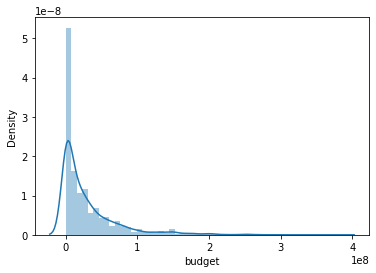

In [20]:
import seaborn as sns

sns.distplot(movies_data['budget'])

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

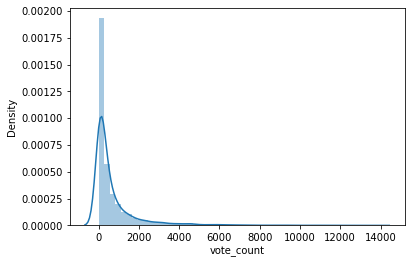

In [22]:
sns.distplot(movies_data['vote_count'])


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

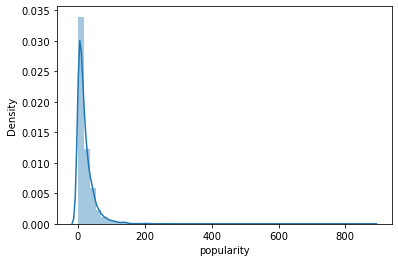

In [23]:
sns.distplot(movies_data['popularity'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runtime', ylabel='Density'>

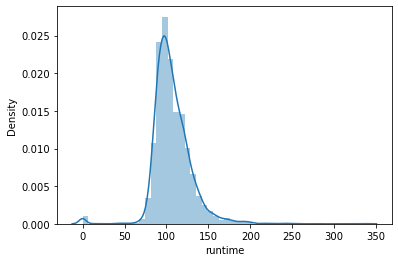

In [24]:
sns.distplot(movies_data['runtime'])

# DATA VISUALIZATION

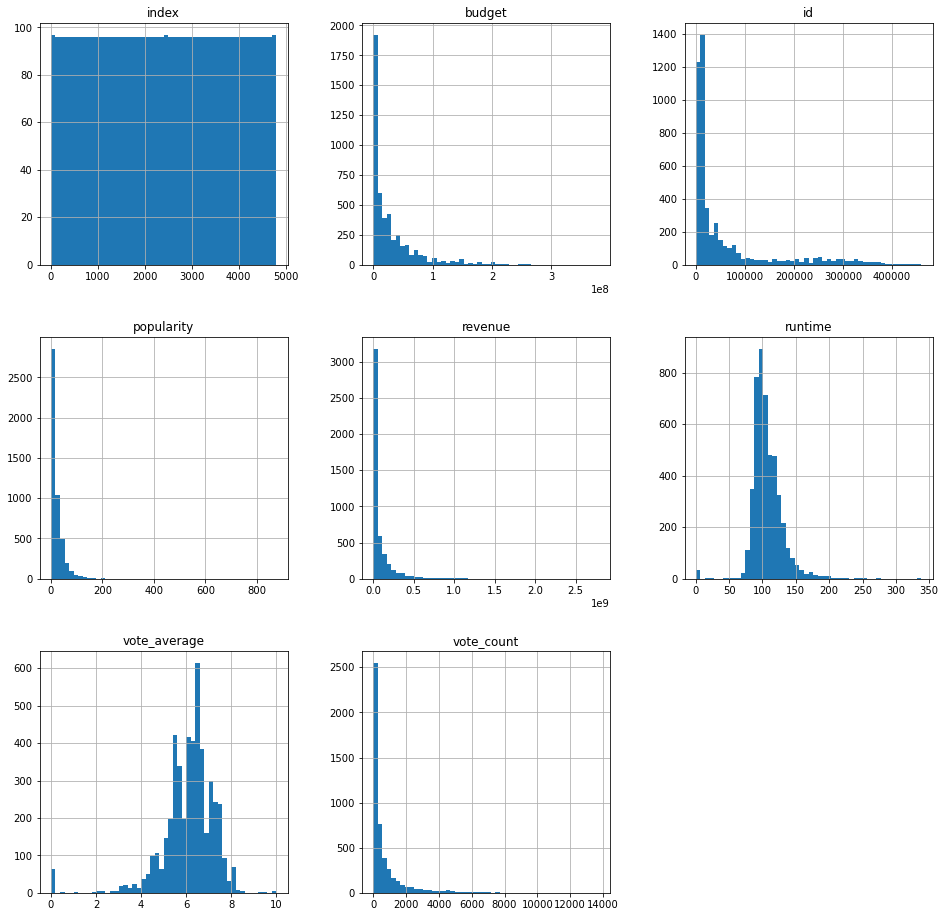

In [25]:
import matplotlib.pyplot as plt
movies_data.hist(bins=50,figsize=(16,16))
plt.show()

In [14]:
## cosine similarity
similarity_score = cosine_similarity(vector_feature)

In [15]:
print(similarity_score)

[[1.         0.12698325 0.02855457 ... 0.         0.         0.        ]
 [0.12698325 1.         0.05346068 ... 0.02625756 0.         0.        ]
 [0.02855457 0.05346068 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.02625756 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [16]:
print(similarity_score.shape)

(4803, 4803)


In [58]:
## get the movie name from user 
movie_name=input('enter ur fav movie name : ')

enter ur fav movie name : iron man


In [59]:
## list of movies
list_of_all_titles = movies_data['title'].tolist()


In [60]:
## find close match to the name enterd by user
find_close_match = difflib.get_close_matches(movie_name,list_of_all_titles)


In [61]:
close_match = find_close_match[0]


In [62]:

index_of_movie = movies_data[movies_data.title == close_match]['index'].values[0]


In [63]:
similarity__score = list(enumerate(similarity_score[index_of_movie]))

In [64]:
sorted_similar_movies = sorted(similarity__score , key = lambda x:x[1], reverse = True)


In [65]:
print('movies suggested for you : \n')

i=1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index==index]['title'].values[0]
    if(i<30):
        print(i, '.',title_from_index)
        i+=1

movies suggested for you : 

1 . Iron Man
2 . X-Men: The Last Stand
3 . The Avengers
4 . X-Men
5 . Iron Man 3
6 . X-Men: Days of Future Past
7 . The Amazing Spider-Man 2
8 . X2
9 . The Incredible Hulk
10 . X-Men: Apocalypse
11 . X-Men: First Class
12 . Iron Man 2
13 . Deadpool
14 . Captain America: Civil War
15 . Captain America: The Winter Soldier
16 . Super
17 . Ant-Man
18 . The Expendables 3
19 . Kick-Ass 2
20 . Monsters
21 . Avengers: Age of Ultron
22 . Firefox
23 . Mallrats
24 . Spider-Man 2
25 . The Extra Man
26 . Hav Plenty
27 . Rotor DR1
28 . The Amazing Spider-Man
29 . The Joneses


In [67]:
movie_name=input('enter ur fav movie name : ')
list_of_all_titles = movies_data['title'].tolist()
find_close_match = difflib.get_close_matches(movie_name,list_of_all_titles)
close_match = find_close_match[0]
index_of_movie = movies_data[movies_data.title == close_match]['index'].values[0]
similarity__score = list(enumerate(similarity_score[index_of_movie]))
sorted_similar_movies = sorted(similarity__score , key = lambda x:x[1], reverse = True)

print('movies suggested for you : \n')

i=1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index==index]['title'].values[0]
    if(i<30):
        print(i, '.',title_from_index)
        i+=1


enter ur fav movie name : avatar
movies suggested for you : 

1 . Avatar
2 . Space Dogs
3 . Alien
4 . Moonraker
5 . Cargo
6 . Guardians of the Galaxy
7 . The Astronaut's Wife
8 . Wing Commander
9 . Pocahontas
10 . Star Wars: Clone Wars: Volume 1
11 . The Right Stuff
12 . Planet of the Apes
13 . Star Trek
14 . Men in Black II
15 . Treasure Planet
16 . Star Trek Beyond
17 . The Iron Giant
18 . John Carter
19 . Titan A.E.
20 . The Empire Strikes Back
21 . Jupiter Ascending
22 . Jason X
23 . Men in Black
24 . AVP: Alien vs. Predator
25 . Space Cowboys
26 . Supernova
27 . Damnation Alley
28 . Return of the Jedi
29 . Elysium
